In [2]:
import numpy as np
import pandas as pd

import numpy as np
from pandas.tseries.offsets import BDay
import math
import random

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
from pyfinance import TSeries


In [4]:
from hurst import compute_Hc, random_walk

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from hurst import compute_Hc, random_walk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

In [6]:
# Load datasets

In [27]:
X_basic = pd.read_pickle('model_0_Xtest.pkl')
y_basic = pd.read_pickle('model_0_ytest.pkl')

In [8]:
X_roc5_1 = pd.read_pickle('model_1_Xtest.pkl')
y_roc5_1 = pd.read_pickle('model_1_ytest.pkl')

In [9]:
X_5h_2 = pd.read_pickle('model_2_Xtest.pkl')
y_5h_2 = pd.read_pickle('model_2_ytest.pkl')

In [10]:
# load ML modules

In [11]:
import pickle

In [28]:
filename = 'model_no0_basic.sav'
model_basic = pickle.load(open(filename, 'rb'))

In [16]:
filename = 'model_no1_roc_5.sav'
model_roc5_1 = pickle.load(open(filename, 'rb'))

In [17]:
filename = 'model_no2_5hour.sav'
model_5h_2 = pickle.load(open(filename, 'rb'))

In [18]:
#### Iteration accuracy prediction

In [19]:
# basic model

In [30]:
model_basic.score(X_basic, y_basic)

0.54304

In [31]:
y_pred = model_basic.predict(X_basic)

In [32]:
y_pred

array([-1., -1., -1., ...,  1., -1., -1.])

In [33]:
X_basic['shift_returns'] = X_basic[['returns']].shift(-1)
X_basic['predicted'] = y_pred
X_basic['actual'] = y_basic
X_basic['profit'] = X_basic['predicted'] * X_basic['actual'] 
X_basic=X_basic.sort_index()

X_basic['profit'] =  X_basic['profit']  * X_basic['shift_returns'].abs()
#sampled_X=sampled_X[sampled_X.profit.notnull()]
cum_sum = (100+ 100*X_basic.profit.fillna(0).cumsum())

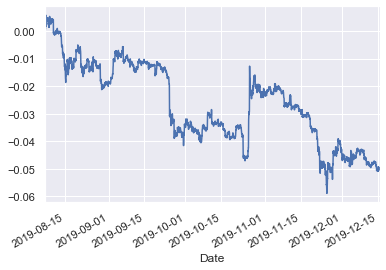

In [34]:
X_basic.returns.cumsum().plot()

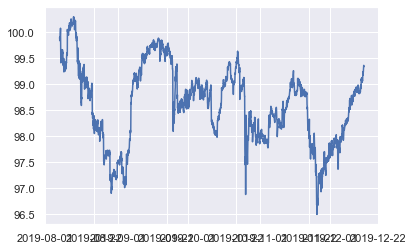

In [35]:
plt.plot( cum_sum)

In [38]:
sampled_X.shape

(300, 32)

In [39]:
X_basic.columns

Index(['price', 'volume', 'range', 'adj_close', 'volume_sma_5',
       'volume_sma_20', 'volume_sma_50', 'volume_sma_500', 'volume_roc',
       'volume_roc_5', 'volume_roc_20', 'volume_roc_50', 'volume_roc_500',
       'returns', 'hurst', 'month', 'day', 'hour', 'week_day', 'ROC_2',
       'ROC_3', 'ROC_5', 'ROC_20', 'ROC_50', 'ROC_100', 'ROC_200', 'ROC_500',
       'abs_returns', 'shift_returns', 'predicted', 'actual', 'profit'],
      dtype='object')

In [52]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_basic.sample(300)
    index_x = sampled_X.index
    
    score = model_basic.score(sampled_X.drop(columns=['shift_returns', 'predicted', 'actual', 'profit']), y_basic.loc[index_x,:])
    result_basic.append(score)

(array([ 1.,  1.,  2.,  2.,  1.,  0.,  2.,  2.,  2.,  6.,  4.,  7.,  9.,
        15., 13., 16., 21., 42., 34., 33., 48., 27., 46., 46., 48., 90.,
        55., 47., 46., 44., 58., 44., 25., 24., 27., 24., 16., 14.,  6.,
         9.,  9.,  2.,  9.,  3.,  9.,  4.,  1.,  2.,  1.,  4.]),
 array([0.45333333, 0.4568    , 0.46026667, 0.46373333, 0.4672    ,
        0.47066667, 0.47413333, 0.4776    , 0.48106667, 0.48453333,
        0.488     , 0.49146667, 0.49493333, 0.4984    , 0.50186667,
        0.50533333, 0.5088    , 0.51226667, 0.51573333, 0.5192    ,
        0.52266667, 0.52613333, 0.5296    , 0.53306667, 0.53653333,
        0.54      , 0.54346667, 0.54693333, 0.5504    , 0.55386667,
        0.55733333, 0.5608    , 0.56426667, 0.56773333, 0.5712    ,
        0.57466667, 0.57813333, 0.5816    , 0.58506667, 0.58853333,
        0.592     , 0.59546667, 0.59893333, 0.6024    , 0.60586667,
        0.60933333, 0.6128    , 0.61626667, 0.61973333, 0.6232    ,
        0.62666667]),
 <a list of 50

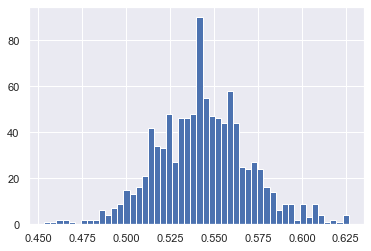

In [53]:
plt.hist(result_basic, bins=50)

In [54]:
np.mean(result_basic)

0.5434865134865136

In [55]:
np.std(result_basic)

0.026976201800468492

In [56]:
np.percentile(result_basic, q=95)

0.59

In [57]:
#distribution of total returns

In [58]:
sampled_X.columns.tolist()

['price',
 'volume',
 'range',
 'adj_close',
 'volume_sma_5',
 'volume_sma_20',
 'volume_sma_50',
 'volume_sma_500',
 'volume_roc',
 'volume_roc_5',
 'volume_roc_20',
 'volume_roc_50',
 'volume_roc_500',
 'returns',
 'hurst',
 'month',
 'day',
 'hour',
 'week_day',
 'ROC_2',
 'ROC_3',
 'ROC_5',
 'ROC_20',
 'ROC_50',
 'ROC_100',
 'ROC_200',
 'ROC_500',
 'abs_returns',
 'shift_returns',
 'predicted',
 'actual',
 'profit']

In [59]:
X_basic['shift_returns'] = X_basic[['returns']].shift(-1)

In [60]:
X_basic[['shift_returns', 'actual']]

,shift_returns,actual
Date,,
2019-08-07 01:00:00,0.001109,1.0
2019-08-07 02:00:00,-0.000073,-1.0
2019-08-07 03:00:00,0.000577,1.0
2019-08-07 04:00:00,-0.000751,-1.0
2019-08-07 05:00:00,0.000009,1.0
...,...,...
2019-12-15 14:00:00,-0.000031,-1.0
2019-12-15 15:00:00,-0.000442,-1.0
2019-12-15 16:00:00,0.000325,1.0


In [64]:
result_basic = []
result_basic_index = []
accuracy = []
for i in range(0, 1000):
    sampled_X = X_basic.sample(300).replace([np.inf, -np.inf], 0)
    
    index_x = sampled_X.index
    y_pred =  model_basic.predict(sampled_X.drop(columns=['shift_returns', 'predicted', 'actual', 'profit']))
    y_test = y_basic.loc[index_x,:]
    accuracy.append(model_basic.score(sampled_X.drop(columns=['shift_returns', 'predicted', 'actual', 'profit']), y_test))
    # ML : model_basic.predict(sampled_X.drop(columns='shift_returns'))
    # random:  rand_sign = [random.choice([-1,1]) for i in range(300)]
    # pos bias: np.ones(300)
    # neg bias: np.ones(300) * -1
    sampled_X['predicted'] = y_pred
    sampled_X['actual'] = y_test
    sampled_X['profit'] = sampled_X['predicted'] * sampled_X['actual'] 
    sampled_X=sampled_X.sort_index()
    
    sampled_X['profit'] =  sampled_X['profit']  * sampled_X['returns'].abs()
    #sampled_X=sampled_X[sampled_X.profit.notnull()]
    cum_sum = (100+ 100*sampled_X.profit.fillna(0).cumsum())
    
    result_basic.append(cum_sum.iloc[-1])
    result_basic_index.append(cum_sum.reset_index(drop=True))

In [65]:
np.sign(sampled_X[['shift_returns', 'actual']]).corr(method='spearman')

,shift_returns,actual
shift_returns,1.000000,0.998162
actual,0.998162,1.000000


(array([ 1.,  3.,  3.,  4.,  2.,  3.,  3.,  5., 12., 13., 14., 16., 24.,
        17., 20., 33., 28., 38., 38., 36., 44., 55., 47., 46., 43., 33.,
        48., 42., 34., 42., 41., 31., 41., 18., 23., 15., 10., 19., 21.,
        10., 10.,  3.,  5.,  0.,  3.,  1.,  0.,  1.,  0.,  1.]),
 array([0.46333333, 0.4666    , 0.46986667, 0.47313333, 0.4764    ,
        0.47966667, 0.48293333, 0.4862    , 0.48946667, 0.49273333,
        0.496     , 0.49926667, 0.50253333, 0.5058    , 0.50906667,
        0.51233333, 0.5156    , 0.51886667, 0.52213333, 0.5254    ,
        0.52866667, 0.53193333, 0.5352    , 0.53846667, 0.54173333,
        0.545     , 0.54826667, 0.55153333, 0.5548    , 0.55806667,
        0.56133333, 0.5646    , 0.56786667, 0.57113333, 0.5744    ,
        0.57766667, 0.58093333, 0.5842    , 0.58746667, 0.59073333,
        0.594     , 0.59726667, 0.60053333, 0.6038    , 0.60706667,
        0.61033333, 0.6136    , 0.61686667, 0.62013333, 0.6234    ,
        0.62666667]),
 <a list of 50

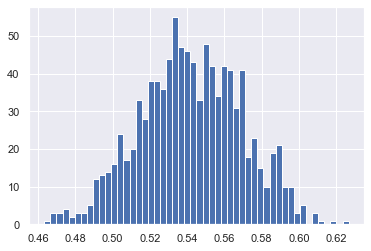

In [66]:
plt.hist(accuracy, bins=50)

In [67]:
np.median(accuracy)

0.54

(array([ 1.,  0.,  1.,  0.,  2.,  1.,  1.,  6.,  3.,  8.,  3., 11.,  8.,
         9., 17., 19., 30., 30., 43., 48., 34., 52., 51., 63., 54., 60.,
        46., 64., 37., 32., 35., 30., 41., 30., 23., 23., 18., 19.,  8.,
        10.,  8.,  3.,  6.,  3.,  2.,  3.,  0.,  2.,  0.,  2.]),
 array([ 97.20156242,  97.36003759,  97.51851276,  97.67698794,
         97.83546311,  97.99393828,  98.15241345,  98.31088862,
         98.46936379,  98.62783896,  98.78631413,  98.94478931,
         99.10326448,  99.26173965,  99.42021482,  99.57868999,
         99.73716516,  99.89564033, 100.0541155 , 100.21259068,
        100.37106585, 100.52954102, 100.68801619, 100.84649136,
        101.00496653, 101.1634417 , 101.32191687, 101.48039205,
        101.63886722, 101.79734239, 101.95581756, 102.11429273,
        102.2727679 , 102.43124307, 102.58971824, 102.74819342,
        102.90666859, 103.06514376, 103.22361893, 103.3820941 ,
        103.54056927, 103.69904444, 103.85751961, 104.01599479,
        104.

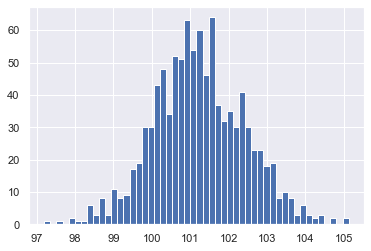

In [68]:
plt.hist(result_basic, bins=50) # ret

(array([ 1.,  0.,  1.,  0.,  2.,  1.,  1.,  6.,  3.,  8.,  3., 11.,  8.,
         9., 17., 19., 30., 30., 43., 48., 34., 52., 51., 63., 54., 60.,
        46., 64., 37., 32., 35., 30., 41., 30., 23., 23., 18., 19.,  8.,
        10.,  8.,  3.,  6.,  3.,  2.,  3.,  0.,  2.,  0.,  2.]),
 array([ 97.20156242,  97.36003759,  97.51851276,  97.67698794,
         97.83546311,  97.99393828,  98.15241345,  98.31088862,
         98.46936379,  98.62783896,  98.78631413,  98.94478931,
         99.10326448,  99.26173965,  99.42021482,  99.57868999,
         99.73716516,  99.89564033, 100.0541155 , 100.21259068,
        100.37106585, 100.52954102, 100.68801619, 100.84649136,
        101.00496653, 101.1634417 , 101.32191687, 101.48039205,
        101.63886722, 101.79734239, 101.95581756, 102.11429273,
        102.2727679 , 102.43124307, 102.58971824, 102.74819342,
        102.90666859, 103.06514376, 103.22361893, 103.3820941 ,
        103.54056927, 103.69904444, 103.85751961, 104.01599479,
        104.

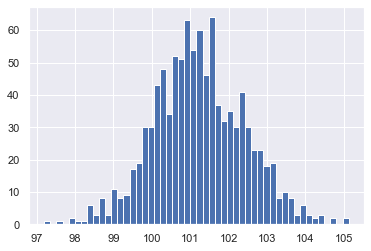

In [69]:
plt.hist(result_basic, bins=50)

In [70]:
np.median(result_basic)

101.1811177203648

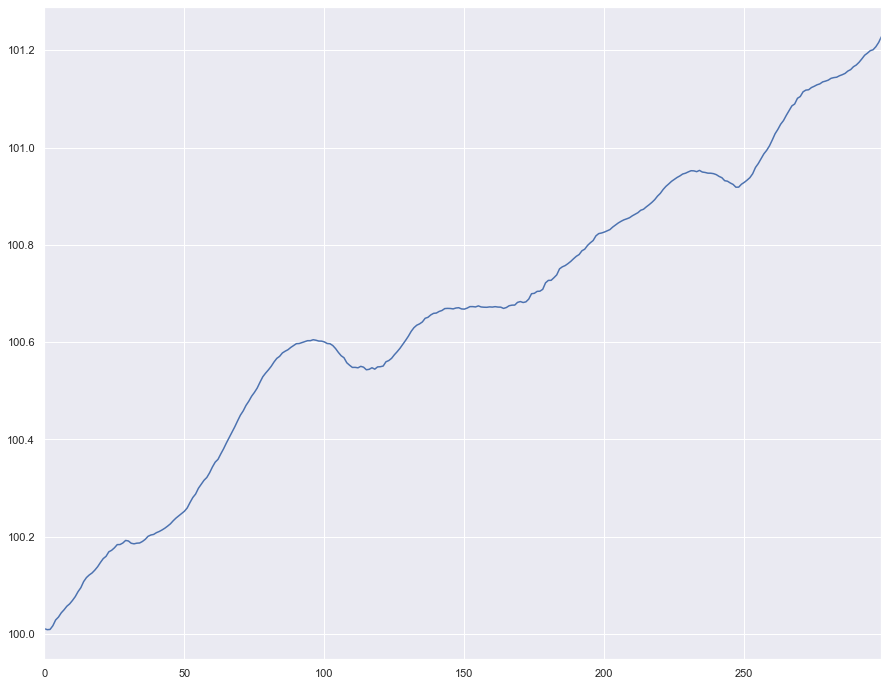

In [71]:
tmp = pd.concat(result_basic_index, axis=1).mean(axis=1).plot(legend=False, figsize=(15,12)) # ret

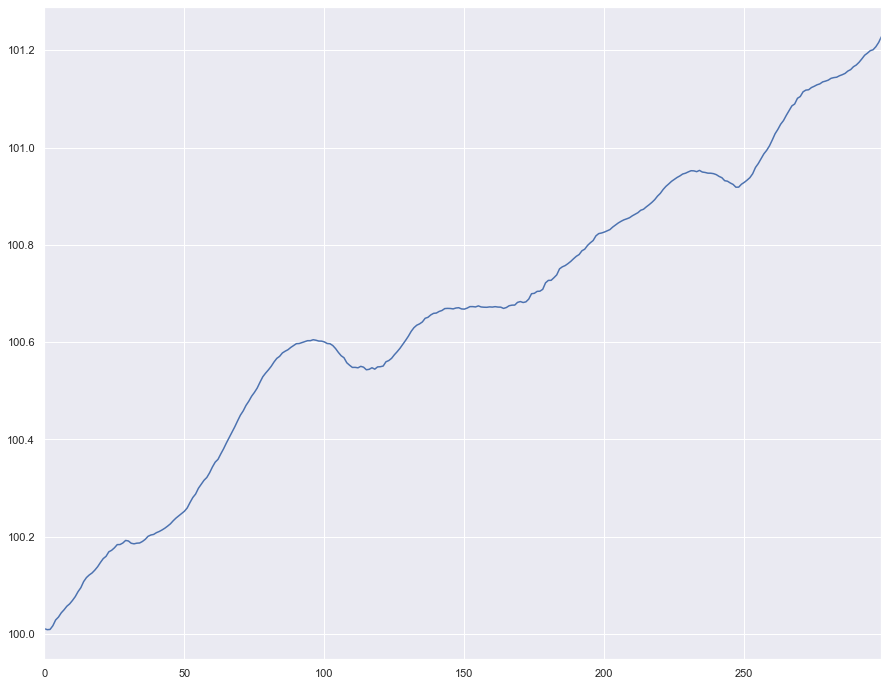

In [72]:
tmp = pd.concat(result_basic_index, axis=1).mean(axis=1).plot(legend=False, figsize=(15,12))

In [73]:
# neg: 100.6
# pos: 99.5
# rand: 99.95
# ML: 

In [77]:
tmp

In [75]:
np.percentile(result_basic, q=95)

103.19216561287445

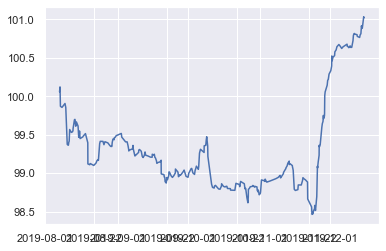

In [76]:
plt.plot(cum_sum)

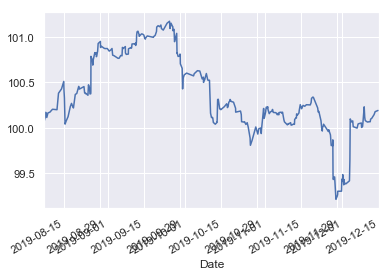

In [81]:
(100+100*(sampled_X.profit).cumsum()).plot()

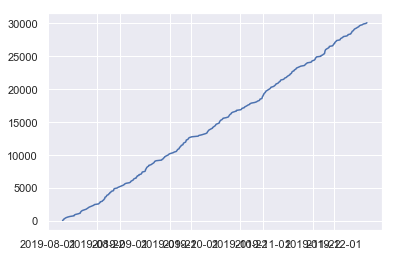

In [82]:
plt.plot(cum_sum.cumsum())

# Roc5 model 1

In [78]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_roc5_1.sample(300)
    index_x = sampled_X.index
    
    score = model_roc5_1.score(sampled_X, y_roc5_1.loc[index_x,:])
    result_basic.append(score)

(array([ 1.,  0.,  2.,  3.,  4.,  3.,  4.,  3.,  6., 12.,  0.,  8., 14.,
        20., 18., 21., 30., 26., 38.,  0., 52., 53., 41., 55., 60., 65.,
        51., 62., 53.,  0., 44., 38., 44., 32., 27., 25., 22., 14.,  9.,
         0.,  9.,  7.,  7.,  5.,  5.,  4.,  2.,  1.,  0.,  1.]),
 array([0.67 , 0.673, 0.676, 0.679, 0.682, 0.685, 0.688, 0.691, 0.694,
        0.697, 0.7  , 0.703, 0.706, 0.709, 0.712, 0.715, 0.718, 0.721,
        0.724, 0.727, 0.73 , 0.733, 0.736, 0.739, 0.742, 0.745, 0.748,
        0.751, 0.754, 0.757, 0.76 , 0.763, 0.766, 0.769, 0.772, 0.775,
        0.778, 0.781, 0.784, 0.787, 0.79 , 0.793, 0.796, 0.799, 0.802,
        0.805, 0.808, 0.811, 0.814, 0.817, 0.82 ]),
 <a list of 50 Patch objects>)

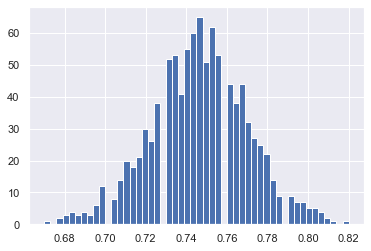

In [79]:
plt.hist(result_basic, bins=50)

In [80]:
np.mean(result_basic)

0.7461438561438561

In [81]:
np.std(result_basic)

0.024001048841267646

In [82]:
np.percentile(result_basic, q=95)

0.7833333333333333

In [92]:
X_roc5_1['roc_5'] = X_roc5_1.price.pct_change(5)
X_roc5_1['shift_returns'] = X_roc5_1.roc_5.shift(-1)
X_roc5_1.dropna(inplace=True)
X_roc5_1=X_roc5_1[X_roc5_1.shift_returns!=0.0]
X_roc5_1.shift_returns = np.sign(X_roc5_1.shift_returns)

In [88]:
result_basic = []
result_basic_index = []
accuracy = []
result_basic = []
accuracy = []
for i in range(0, 1001):
    sampled_X = X_roc5_1.sample(300)
    index_x = sampled_X.index
    
    score = model_roc5_1.score(sampled_X.drop(columns=['roc_5','shift_returns']), y_roc5_1.loc[index_x,:])
    
 
    y_pred =  model_roc5_1.predict(sampled_X.drop(columns=['roc_5','shift_returns']))
    y_test = y_basic.loc[index_x,:]
    accuracy.append(model_roc5_1.score(sampled_X.drop(columns=['roc_5','shift_returns']), y_roc5_1.loc[index_x,:]))
    # ML : model_basic.predict(sampled_X.drop(columns='shift_returns'))
    # random:  rand_sign = [random.choice([-1,1]) for i in range(300)]
    # pos bias: np.ones(300)
    # neg bias: np.ones(300) * -1
    sampled_X['predicted'] = y_pred
    sampled_X['actual'] = y_test
    sampled_X['profit'] = sampled_X['predicted'] * sampled_X['actual'] 
    sampled_X=sampled_X.sort_index()
    
    sampled_X['profit'] =  sampled_X['profit']  * sampled_X['shift_returns'].abs()
    #sampled_X=sampled_X[sampled_X.profit.notnull()]
    cum_sum = (100+ 100*sampled_X.profit.fillna(0).cumsum())
    
    result_basic.append(cum_sum.iloc[-1])
    result_basic_index.append(cum_sum.reset_index(drop=True))

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\sergey\.conda\envs\quant\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex(

(array([ 1.,  2.,  1.,  5.,  1.,  4.,  1.,  8.,  8., 11., 13., 11., 13.,
        20., 18., 22., 29., 37., 19., 35., 36., 41., 53., 47., 32., 49.,
        39., 57., 41., 47., 38., 21., 20., 31., 28., 26., 22., 10., 23.,
        18., 13., 14.,  9.,  1., 11.,  3.,  5.,  3.,  1.,  3.]),
 array([-7100., -6916., -6732., -6548., -6364., -6180., -5996., -5812.,
        -5628., -5444., -5260., -5076., -4892., -4708., -4524., -4340.,
        -4156., -3972., -3788., -3604., -3420., -3236., -3052., -2868.,
        -2684., -2500., -2316., -2132., -1948., -1764., -1580., -1396.,
        -1212., -1028.,  -844.,  -660.,  -476.,  -292.,  -108.,    76.,
          260.,   444.,   628.,   812.,   996.,  1180.,  1364.,  1548.,
         1732.,  1916.,  2100.]),
 <a list of 50 Patch objects>)

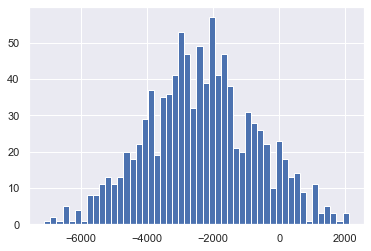

In [89]:
plt.hist(result_basic, bins=50)

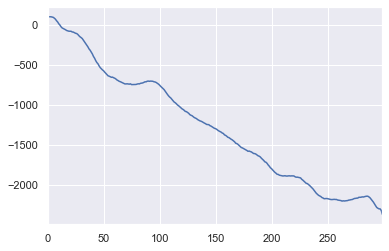

In [90]:
pd.concat(result_basic_index, axis=1).mean(axis=1).plot()

In [91]:
result_basic_index

[0      100.0
 1      100.0
 2      100.0
 3      100.0
 4        0.0
        ...  
 295   -700.0
 296   -800.0
 297   -700.0
 298   -800.0
 299   -900.0
 Name: profit, Length: 300, dtype: float64, 0       100.0
 1       100.0
 2       100.0
 3       100.0
 4       100.0
         ...  
 295   -1700.0
 296   -1800.0
 297   -1700.0
 298   -1800.0
 299   -1900.0
 Name: profit, Length: 300, dtype: float64, 0       100.0
 1       100.0
 2       100.0
 3       100.0
 4       100.0
         ...  
 295   -1800.0
 296   -1900.0
 297   -1800.0
 298   -1900.0
 299   -2000.0
 Name: profit, Length: 300, dtype: float64, 0      100.0
 1      100.0
 2      100.0
 3      100.0
 4      100.0
        ...  
 295   -500.0
 296   -600.0
 297   -500.0
 298   -400.0
 299   -500.0
 Name: profit, Length: 300, dtype: float64, 0       100.0
 1       100.0
 2       100.0
 3       100.0
 4       100.0
         ...  
 295   -3200.0
 296   -3300.0
 297   -3400.0
 298   -3500.0
 299   -3600.0
 Name: profit, Length: 30

# 5h candles model

In [256]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_5h_2.sample(100)
    index_x = sampled_X.index
    
    score = model_5h_2.score(sampled_X, y_5h_2.loc[index_x,:])
    result_basic.append(score)
    
    
    


(array([  1.,   0.,   0.,   0.,   6.,   0.,   5.,   0.,  18.,   0.,  26.,
          0.,  35.,   0.,  66.,   0.,  64.,   0.,  83.,   0.,  99.,   0.,
        114.,   0.,   0., 111.,   0., 108.,   0.,  86.,   0.,  62.,   0.,
         46.,   0.,  28.,   0.,  20.,   0.,  10.,   0.,   4.,   0.,   4.,
          0.,   3.,   0.,   1.,   0.,   1.]),
 array([0.49  , 0.4948, 0.4996, 0.5044, 0.5092, 0.514 , 0.5188, 0.5236,
        0.5284, 0.5332, 0.538 , 0.5428, 0.5476, 0.5524, 0.5572, 0.562 ,
        0.5668, 0.5716, 0.5764, 0.5812, 0.586 , 0.5908, 0.5956, 0.6004,
        0.6052, 0.61  , 0.6148, 0.6196, 0.6244, 0.6292, 0.634 , 0.6388,
        0.6436, 0.6484, 0.6532, 0.658 , 0.6628, 0.6676, 0.6724, 0.6772,
        0.682 , 0.6868, 0.6916, 0.6964, 0.7012, 0.706 , 0.7108, 0.7156,
        0.7204, 0.7252, 0.73  ]),
 <a list of 50 Patch objects>)

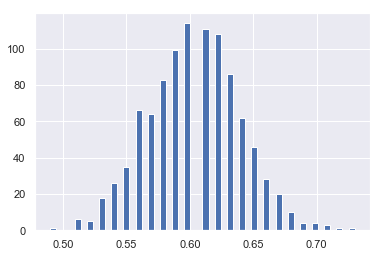

In [257]:
plt.hist(result_basic, bins=50)

In [258]:
np.var(result_basic)

0.001306582129159552

In [260]:
np.percentile(result_basic, q=95)

0.66

In [93]:
X_5h_2['roc_5'] = X_5h_2.price.pct_change(5)
X_5h_2['shift_returns'] = X_5h_2.roc_5.shift(-1)
X_5h_2.dropna(inplace=True)
X_5h_2=X_5h_2[X_5h_2.shift_returns!=0.0]
X_5h_2.shift_returns = np.sign(X_5h_2.shift_returns)

In [133]:
X_5h_2.columns

Index(['price', 'volume', 'range', 'adj_close', 'volume_sma_5',
       'volume_sma_20', 'volume_sma_50', 'volume_sma_500', 'volume_roc',
       'volume_roc_5', 'volume_roc_20', 'volume_roc_50', 'volume_roc_500',
       'returns', 'hurst', 'month', 'day', 'hour', 'week_day', 'ROC_2',
       'ROC_3', 'ROC_5', 'ROC_20', 'ROC_50', 'ROC_100', 'ROC_200', 'ROC_500',
       'abs_returns', 'roc_5', 'shift_returns'],
      dtype='object')

In [139]:
pd.DataFrame(model_5h_2.feature_importances_, index=X_5h_2.drop(columns=['shift_returns', 'roc_5']).columns).sort_values(by=0)

,0
month,0.013054
week_day,0.017293
day,0.025729
volume_sma_20,0.029608
ROC_500,0.030306
volume_sma_50,0.030540
hour,0.030581
price,0.031963
ROC_200,0.032290
ROC_100,0.032410


In [129]:
pd.concat([X_5h_2.columns.tolist(),list(model_5h_2.feature_importances_)], axis=1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [115]:
result_basic = []
result_basic_index = []
accuracy = []
result_basic = []
accuracy = []
for i in range(0, 101):
    sampled_X = X_5h_2.sample(50)
    index_x = sampled_X.index
    
    score = model_5h_2.score(sampled_X.drop(columns=['roc_5','shift_returns']), y_5h_2.loc[index_x,:])
    
 
    y_pred = model_5h_2.predict(sampled_X.drop(columns=['roc_5','shift_returns']))
    y_test = y_5h_2.loc[index_x,:]
    accuracy.append(model_5h_2.score(sampled_X.drop(columns=['roc_5','shift_returns']), y_5h_2.loc[index_x,:]))
    # ML : model_basic.predict(sampled_X.drop(columns='shift_returns'))
    # random:  rand_sign = [random.choice([-1,1]) for i in range(300)]
    # pos bias: np.ones(300)
    # neg bias: np.ones(300) * -1
    sampled_X['predicted'] = y_pred
    sampled_X['actual'] = y_test
    sampled_X['profit'] = sampled_X['predicted'] * sampled_X['actual'] 
    sampled_X=sampled_X.sort_index()
    
    sampled_X['profit'] =  sampled_X['profit']  * sampled_X['shift_returns'].abs()
    #sampled_X=sampled_X[sampled_X.profit.notnull()]
    cum_sum = (100+ 100*sampled_X.profit.fillna(0).cumsum())
    
    result_basic.append(cum_sum.iloc[-1])
    result_basic_index.append(cum_sum.reset_index(drop=True))

(array([ 2.,  4., 16., 23.,  9., 10., 22.,  5.,  8.,  2.]),
 array([0.46, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7 , 0.73, 0.76]),
 <a list of 10 Patch objects>)

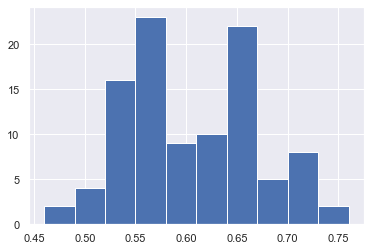

In [116]:
plt.hist(accuracy)

In [117]:
np.mean(accuracy)

0.6049504950495049

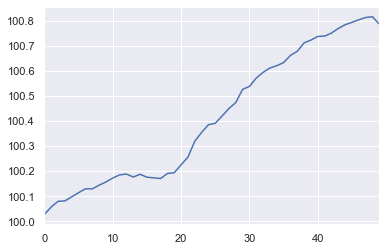

In [118]:
pd.concat(result_basic_index, axis=1).mean(axis=1).plot()

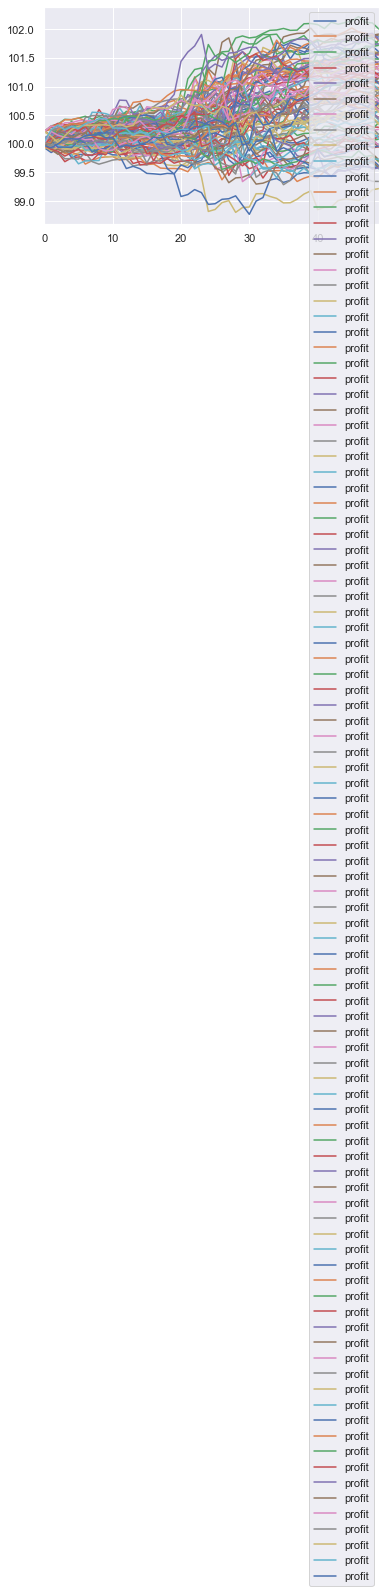

In [119]:
pd.concat(result_basic_index, axis=1).plot()

# random test


In [129]:
mu = 0.5
sigma =0.025
s = np.random.normal(mu, sigma, 1000)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  4.,  2.,  4.,  9.,
         5., 16., 17., 19., 23., 30., 39., 36., 47., 46., 71., 52., 51.,
        54., 59., 50., 51., 55., 43., 43., 35., 24., 30., 19., 14., 13.,
        10.,  4.,  7.,  3.,  5.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.40518585, 0.40879646, 0.41240707, 0.41601768, 0.41962829,
        0.4232389 , 0.42684951, 0.43046012, 0.43407073, 0.43768134,
        0.44129195, 0.44490256, 0.44851317, 0.45212377, 0.45573438,
        0.45934499, 0.4629556 , 0.46656621, 0.47017682, 0.47378743,
        0.47739804, 0.48100865, 0.48461926, 0.48822987, 0.49184048,
        0.49545109, 0.4990617 , 0.50267231, 0.50628292, 0.50989353,
        0.51350414, 0.51711475, 0.52072536, 0.52433597, 0.52794658,
        0.53155719, 0.53516779, 0.5387784 , 0.54238901, 0.54599962,
        0.54961023, 0.55322084, 0.55683145, 0.56044206, 0.56405267,
        0.56766328, 0.57127389, 0.5748845 , 0.57849511, 0.58210572,
        0.58571633]),
 <a list of 50

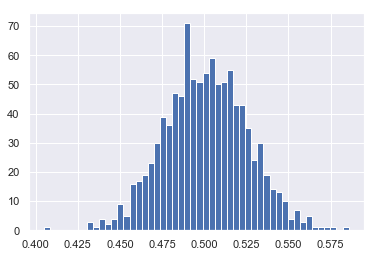

In [130]:
plt.hist(s,bins=50)

In [131]:
### Positive bias based on basic and roc5 model


In [146]:
# random accuracy variation 48-52%

In [251]:
# positive bias bench
result_basic = []
for i in range(0, 1001):
    sampled_X = X_basic.sample(300)
    index_x = sampled_X.index
    
    y_pred = np.ones(300)
    y_test = y_basic.loc[index_x,:]
    
    output = y_pred * y_test.shift_returns.values
    
    pos = output[output==1]
    neg = output[output==-1]
    
    score = len(neg) / (len(pos)+len(neg))
    result_basic.append(score)

(array([ 2.,  1.,  1.,  0.,  1.,  5.,  2.,  5.,  8.,  8.,  6.,  9., 15.,
        17., 18., 16., 24., 38., 50., 28., 42., 44., 29., 53., 48., 43.,
        48., 55., 45., 48., 38., 42., 32., 31., 23., 29., 23., 13.,  9.,
        11.,  8.,  7.,  5.,  7.,  3.,  2.,  3.,  1.,  2.,  3.]),
 array([0.42666667, 0.43006667, 0.43346667, 0.43686667, 0.44026667,
        0.44366667, 0.44706667, 0.45046667, 0.45386667, 0.45726667,
        0.46066667, 0.46406667, 0.46746667, 0.47086667, 0.47426667,
        0.47766667, 0.48106667, 0.48446667, 0.48786667, 0.49126667,
        0.49466667, 0.49806667, 0.50146667, 0.50486667, 0.50826667,
        0.51166667, 0.51506667, 0.51846667, 0.52186667, 0.52526667,
        0.52866667, 0.53206667, 0.53546667, 0.53886667, 0.54226667,
        0.54566667, 0.54906667, 0.55246667, 0.55586667, 0.55926667,
        0.56266667, 0.56606667, 0.56946667, 0.57286667, 0.57626667,
        0.57966667, 0.58306667, 0.58646667, 0.58986667, 0.59326667,
        0.59666667]),
 <a list of 50

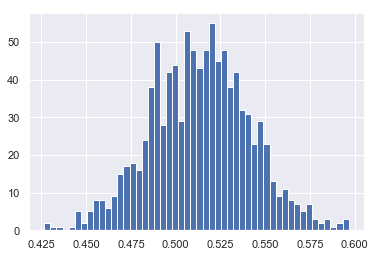

In [252]:
plt.hist(result_basic,bins=50)

In [253]:
np.median(result_basic)

0.5133333333333333

In [254]:
np.std(result_basic)

0.027455038783042278

In [255]:
np.percentile(result_basic, q=95)

0.56

In [185]:
# negative bias bench

In [239]:
result_basic = []
for i in range(0, 1001):
    sampled_X = X_5h_2.sample(100)
    index_x = sampled_X.index
    
    y_pred = np.ones(100)
    y_test = y_5h_2.loc[index_x,:]
    
    output = y_pred * y_test.shift_returns.values
    
    pos = output[output==1]
    neg = output[output==-1]
    
    score = len(neg) / (len(pos)+len(neg))
    result_basic.append(score)

(array([  1.,   0.,   1.,   0.,   5.,   0.,   8.,   0.,   0.,  22.,   0.,
         20.,   0.,  42.,   0.,  57.,   0.,   0.,  72.,   0.,  84.,   0.,
         99.,   0.,   0., 118.,   0., 102.,   0., 101.,   0.,  84.,   0.,
          0.,  69.,   0.,  51.,   0.,  24.,   0.,  18.,   0.,   0.,  14.,
          0.,   5.,   0.,   3.,   0.,   1.]),
 array([0.42  , 0.4244, 0.4288, 0.4332, 0.4376, 0.442 , 0.4464, 0.4508,
        0.4552, 0.4596, 0.464 , 0.4684, 0.4728, 0.4772, 0.4816, 0.486 ,
        0.4904, 0.4948, 0.4992, 0.5036, 0.508 , 0.5124, 0.5168, 0.5212,
        0.5256, 0.53  , 0.5344, 0.5388, 0.5432, 0.5476, 0.552 , 0.5564,
        0.5608, 0.5652, 0.5696, 0.574 , 0.5784, 0.5828, 0.5872, 0.5916,
        0.596 , 0.6004, 0.6048, 0.6092, 0.6136, 0.618 , 0.6224, 0.6268,
        0.6312, 0.6356, 0.64  ]),
 <a list of 50 Patch objects>)

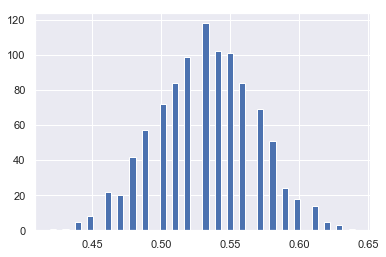

In [240]:
plt.hist(result_basic,bins=50)

In [241]:
np.mean(result_basic)

0.5322977022977023

In [242]:
np.median(result_basic)

0.53

In [243]:
np.std(result_basic)

0.036088957755017546

In [244]:
np.max(result_basic)

0.64

In [245]:
np.percentile(result_basic, q=95)

0.59